In [ ]:
!pip install transformers
!pip install datasets
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch


In [ ]:
from datasets import load_dataset

dataset = load_dataset("imdb")

print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

dataset = dataset.map(tokenize_function, batched=True)

dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

print(dataset['train'][0])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'label': tensor(0), 'input_ids': tensor([  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026,
         2678,  3573,  2138,  1997,  2035,  1996,  6704,  2008,  5129,  2009,
         2043,  2009,  2001,  2034,  2207,  1999,  3476,  1012,  1045,  2036,
         2657,  2008,  2012,  2034,  2009,  2001,  8243,  2011,  1057,  1012,
         1055,  1012,  8205,  2065,  2009,  2412,  2699,  2000,  4607,  2023,
         2406,  1010,  3568,  2108,  1037,  5470,  1997,  3152,  2641,  1000,
         6801,  1000,  1045,  2428,  2018,  2000,  2156,  2023,  2005,  2870,
         1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996,
         5436,  2003,  8857,  2105,  1037,  2402,  4467,  3689,  3076,  2315,
        14229,  2040,  4122,  2000,  4553,  2673,  2016,  2064,  2055,  2166,
         1012,  1999,  3327,  2016,  4122,  2000,  3579,  2014,  3086,  2015,
         2000,  2437,  2070,  4066,  1997,  4516,  2006,  2054,  1996,  2779,
        25430, 14728,  2245,  

In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix
import torch
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
print(f"Train Set Size: {len(dataset['train'])}")
print(f"Test Set Size: {len(dataset['test'])}")


Train Set Size: 25000
Test Set Size: 25000


In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

print(model)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    evaluation_strategy="epoch",     # Evaluate every epoch
    save_strategy="epoch",           # Save model every epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Weight decay for optimization
    logging_dir='./logs',            # Logging directory
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=dataset['train'],      # Training dataset
    eval_dataset=dataset['test'],       # Evaluation dataset
    tokenizer=tokenizer                  # Tokenizer to preprocess text
)


<ipython-input-9-6544df7eb120>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.201200,0.212015
2,0.123900,0.218288
3,0.072000,0.258218


TrainOutput(global_step=4689, training_loss=0.1470670980745146, metrics={'train_runtime': 9948.4438, 'train_samples_per_second': 7.539, 'train_steps_per_second': 0.471, 'total_flos': 1.9733329152e+16, 'train_loss': 0.1470670980745146, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()

print(eval_results)


{'eval_loss': 0.2582184076309204, 'eval_runtime': 773.8032, 'eval_samples_per_second': 32.308, 'eval_steps_per_second': 2.02, 'epoch': 3.0}


              precision    recall  f1-score   support

    negative       0.94      0.94      0.94     12500
    positive       0.94      0.94      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000



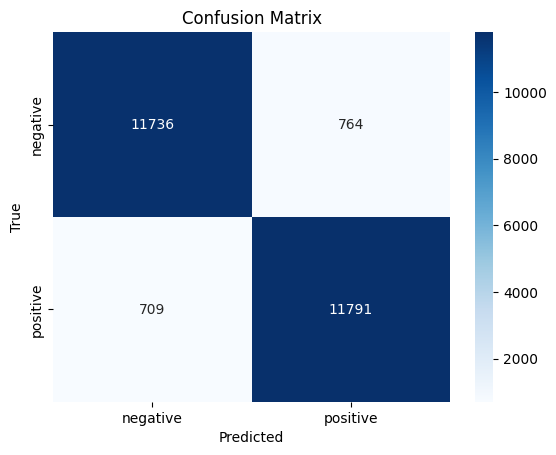

In [ ]:

predictions = trainer.predict(dataset['test'])

# Get predicted labels
preds = np.argmax(predictions.predictions, axis=1)


true_labels = predictions.label_ids


print(classification_report(true_labels, preds, target_names=['negative', 'positive']))

# confusion matrix
cm = confusion_matrix(true_labels, preds)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_tokenizer')


('./sentiment_tokenizer/tokenizer_config.json',
 './sentiment_tokenizer/special_tokens_map.json',
 './sentiment_tokenizer/vocab.txt',
 './sentiment_tokenizer/added_tokens.json')

In [ ]:
# Check the dataset structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50000
    })
})


In [ ]:
# Display the first 5 rows of the training dataset
print(dataset['train'][:5])


{'label': tensor([0, 0, 0, 0, 0]), 'input_ids': tensor([[  101,  1045, 12524,  ...,     0,     0,     0],
        [  101,  1000,  1045,  ...,     0,     0,     0],
        [  101,  2065,  2069,  ...,     0,     0,     0],
        [  101,  2023,  2143,  ...,     0,     0,     0],
        [  101,  2821,  1010,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
# Count positive and negative sentiment labels in the training data
positive_count_train = sum(dataset['train']['label'] == 1)
negative_count_train = sum(dataset['train']['label'] == 0)

# Count positive and negative sentiment labels in the test data
positive_count_test = sum(dataset['test']['label'] == 1)
negative_count_test = sum(dataset['test']['label'] == 0)

print(f"Training set - Positive: {positive_count_train}, Negative: {negative_count_train}")
print(f"Test set - Positive: {positive_count_test}, Negative: {negative_count_test}")


Training set - Positive: 12500, Negative: 12500
Test set - Positive: 12500, Negative: 12500


In [ ]:
from datasets import load_dataset

# Step 1: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 2: Map the label (0, 1) to sentiment (negative, positive)
def map_sentiment(label):
    if label == 1:
        return "positive"
    else:
        return "negative"

# Step 3: Add sentiment labels to the dataset (train and test)
dataset['train'] = dataset['train'].map(lambda x: {'sentiment': map_sentiment(x['label'])})
dataset['test'] = dataset['test'].map(lambda x: {'sentiment': map_sentiment(x['label'])})


for i in range(5):  # Loop through the first 5 entries
    review = dataset['train'][i]
    print(f"Review: {review['text']}")
    print(f"Sentiment: {review['sentiment']}")
    print('-' * 100)


Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betw

In [ ]:
from datasets import load_dataset

dataset = load_dataset('imdb')

def map_sentiment(label):
    if label == 1:
        return "positive"
    else:
        return "negative"

dataset['train'] = dataset['train'].map(lambda x: {'sentiment': map_sentiment(x['label'])})
dataset['test'] = dataset['test'].map(lambda x: {'sentiment': map_sentiment(x['label'])})

positive_count = 0
negative_count = 0

for review in dataset['train']:
    if positive_count < 5 and review['sentiment'] == 'positive':
        print(f"Review: {review['text']}")
        print(f"Sentiment: {review['sentiment']}")
        print('-' * 100)
        positive_count += 1

    if negative_count < 5 and review['sentiment'] == 'negative':
        print(f"Review: {review['text']}")
        print(f"Sentiment: {review['sentiment']}")
        print('-' * 100)
        negative_count += 1

    if positive_count >= 5 and negative_count >= 5:
        break


Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betw

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import numpy as np

# pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('./sentiment_model')  # Path to your trained model directory

=def predict_sentiment(text):
    # Tokenize and encode the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)


    with torch.no_grad():
        outputs = model(**inputs)


    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()

    # Map
    sentiment = "positive" if prediction == 1 else "negative"

    return sentiment

#testing with custom sentences
new_statement = "Wow, another groundbreaking movie—if groundbreaking means incredibly boring."
predicted_sentiment = predict_sentiment(new_statement)

print(f"Sentiment: {predicted_sentiment}")


Sentiment: negative
